In [5]:
# Define trained model and test dataset

import torch

model_file = r'c:\Data\SpineUs\TrainingOutput_0_128\model.pt'
test_folder = r'c:\Data\SpineUs\TestingData_0_128'
in_channels = 1
out_channels = 1


In [6]:
import random

from torchvision import transforms

from UltrasoundDataset import UltrasoundDataset
from UNet import UNet

transform = transforms.Resize((128, 128))
test_dataset = UltrasoundDataset(test_folder, transform=transform)

# Load model and set to eval mode

model = UNet(in_channels=in_channels, out_channels=out_channels)
model.load_state_dict(torch.load(model_file))

# Get a random sample of 5 images from the test dataset

sample = random.sample(range(len(test_dataset)), 5)

# Get the inputs and labels from the sample

inputs = torch.stack([test_dataset[i][0] for i in sample])
labels = torch.stack([test_dataset[i][1] for i in sample])

# Run the model on the samples

logits = model(inputs)

# Normalize the outputs

outputs = torch.sigmoid(logits)


In [7]:

print(f"Range of values in inputs: {inputs.min()} - {inputs.max()}")
print(f"Range of values in labels: {labels.min()} - {labels.max()}")
print(f"Range of values in logits: {logits.min()} - {logits.max()}")
print(f"Range of values in outputs: {outputs.min()} - {outputs.max()}")

Range of values in inputs: 0.0 - 253.0
Range of values in labels: 0.0 - 1.0
Range of values in logits: -608.7781372070312 - 1.1463888883590698
Range of values in outputs: 0.0 - 0.7588506937026978


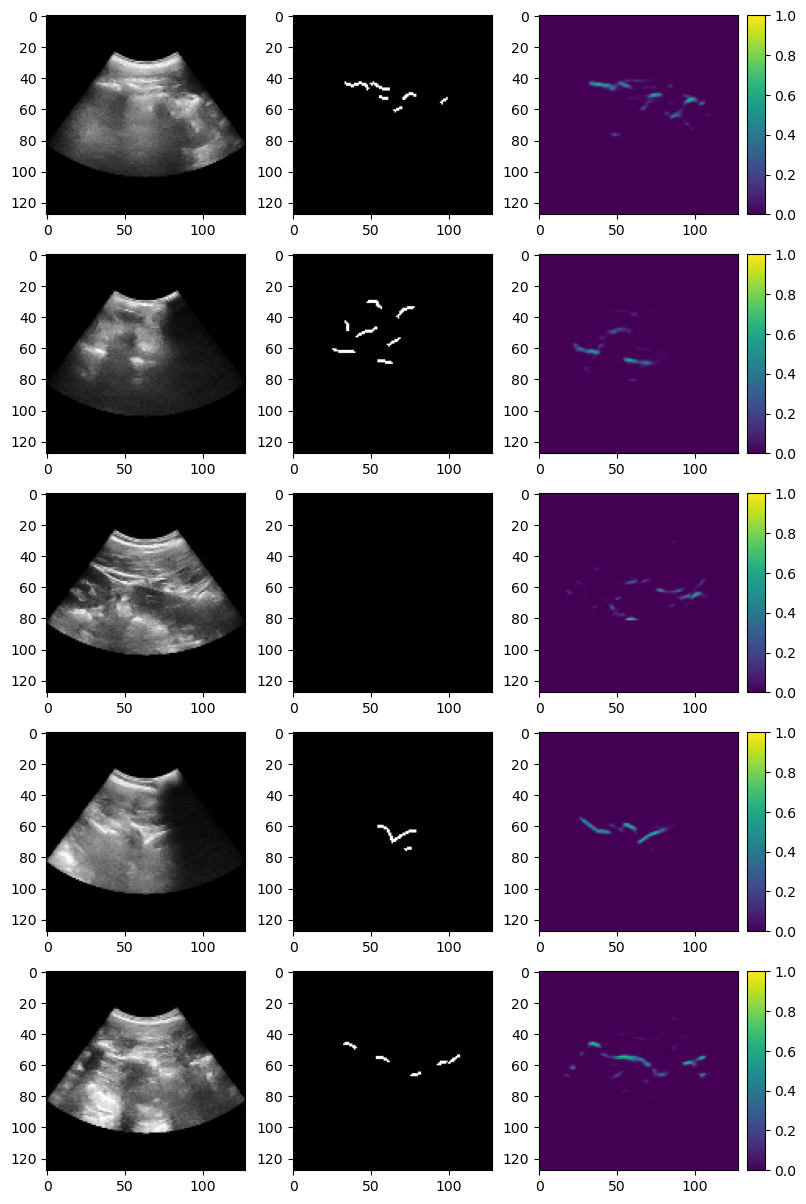

In [8]:

# Visualize the results with a colorbars

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 3, figsize=(9, 15))
for i in range(5):
    axes[i, 0].imshow(inputs[i, 0, :, :], cmap="gray")
    axes[i, 1].imshow(labels[i].squeeze(), cmap="gray")
    im = axes[i, 2].imshow(outputs[i].squeeze().detach().numpy(), vmin=0, vmax=1, cmap="viridis")
    
    # Create an additional axis for the colorbar
    cax = fig.add_axes([axes[i, 2].get_position().x1 + 0.01,
                        axes[i, 2].get_position().y0,
                        0.02,
                        axes[i, 2].get_position().height])
    fig.colorbar(im, cax=cax)

plt.show()